In [ ]:
#NEwspaper documentation: https://newspaper.readthedocs.io/en/latest/

In [262]:
import newspaper
from newspaper import Article
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [46]:
website = newspaper.build("https://www.prnewswire.com/news-releases/news-releases-list/",memoize_articles = False)


In [66]:
#Try expect because some artices return 404 error, which stops the entire code
articles = []
for i in range(len(website.articles)):
    try:
        article = website.articles[i]
        article.download()
        article.parse()
        articles.append(article)
    except:
        pass

In [275]:
#Get the title,id,keyword,text and publishing date from each article
article_title = []
article_text = []
article_keywords = []
artical_publish_date = []
for article in articles:
    article.nlp()
    artical_publish_date.append(article.publish_date)
    article_keywords.append(article.keywords)
    article_title.append(article.title)
    article_text.append(article.text)

In [278]:
#Store all the data into a dataframe
data = pd.DataFrame({"Article_Title": article_title,"Article_id": articles,"Keyword": article_keywords,"Article_Text": article_text,"Publish Date": artical_publish_date})

In [279]:
data.

,Article_Title,Article_id,Keyword,Article_Text,Publish Date
0,Internet of Things News and Press Releases fro...,<newspaper.article.Article object at 0x0000023...,"[pr, internet, request, subject, journalists, ...","Journalists and Bloggers\n\nThe news you need,...",None
1,All Heavy Industry & Manufacturing News and Pr...,<newspaper.article.Article object at 0x0000023...,"[pr, request, manufacturing, heavy, journalist...","Journalists and Bloggers\n\nThe news you need,...",None
2,"All Machine Tools, Metalworking and Metallurgy...",<newspaper.article.Article object at 0x0000023...,"[pr, request, machine, metalworking, subject, ...","Journalists and Bloggers\n\nThe news you need,...",None
3,All Consumer Products & Retail News and Press ...,<newspaper.article.Article object at 0x0000023...,"[submit, pr, request, products, journalists, s...","Journalists and Bloggers\n\nThe news you need,...",None
4,All Amusement Parks and Tourist Attractions Ne...,<newspaper.article.Article object at 0x0000023...,"[pr, request, attractions, parks, journalists,...","Journalists and Bloggers\n\nThe news you need,...",None
...,...,...,...,...,...
103,online-discoverability-survival-kit-for-small-...,<newspaper.article.Article object at 0x0000023...,"[keywords, onlinediscoverabilitysurvivalkitfor...",ONLINE DISCOVERABILITY SURVIVAL KIT FOR SMALL ...,None
104,Intermedia Boosts Campaign Visibility with Awa...,<newspaper.article.Article object at 0x0000023...,"[strategy, creative, multivu, campaign, boosts...",CHALLENGE\n\nGarnering awareness for primary r...,None
105,OpenTable Sparks Engagement with Road Trip-The...,<newspaper.article.Article object at 0x0000023...,"[visual, tripthemed, opentable, multimedia, sp...",CHALLENGE\n\nHooking a New Audience with Compe...,None
106,St. Baldrick's Changes Narrative Surrounding C...,<newspaper.article.Article object at 0x0000023...,"[cancers, multichannel, baldricks, volunteer, ...",St. Baldrick’s worked to craft content that te...,None


In [168]:
#Dropping duplicates if any
data.drop_duplicates(subset = "Article_Text",inplace = True,ignore_index = True)

In [243]:
#NOT FOUND: TSLA,SHOP,BAMA,CNR,ENB,BNS,TRI,BMO,CP,CNQ,TRP,BCE,NTR,AAPL,CSU,MFU,ABX
#GM:General Motors
#RY: Royal Bank of Canada
#TD: TD Bank
#SU: Suncor Energy
#CM: CIBC


names = ["GM","RY","TD","SU","CM"]
tickers = {i:[] for i in names}
for i in range(len(data)):
    for name in names:
        if name in data.iloc[i]["Article_Text"]:
            tickers[name].append(i)

In [284]:
#Dictionary of lists where each list stores the index of the dataframe where the ticker is found 
tickers

{'GM': [5, 6],
 'RY': [60],
 'TD': [25, 62],
 'SU': [3, 7, 18, 19, 39, 61, 78],
 'CM': [31, 76]}

In [253]:
stock = {}
for name in names:
    temp = yf.Ticker(name)
    stock[name] = temp.history(period = "YTD")

In [286]:
#Dictionary of dataframes where each dataframe stores the financial data of the corresponding ticker
stock

{'GM':                  Open       High        Low      Close    Volume  Dividends  \
 Date                                                                          
 2021-01-04  41.950001  42.119999  40.139999  40.509998  15768100          0   
 2021-01-05  40.060001  41.840000  40.040001  41.660000  18045800          0   
 2021-01-06  41.919998  43.849998  41.860001  42.980000  22694900          0   
 2021-01-07  43.980000  43.980000  42.959999  43.320000  13625700          0   
 2021-01-08  43.310001  43.490002  42.320000  43.060001  18426200          0   
 ...               ...        ...        ...        ...       ...        ...   
 2021-11-15  63.660000  63.730000  62.630001  62.970001  14372100          0   
 2021-11-16  63.240002  63.279999  61.930000  62.610001  16115000          0   
 2021-11-17  63.330002  65.070000  62.380001  64.610001  29983400          0   
 2021-11-18  64.330002  65.180000  62.090000  62.330002  23308100          0   
 2021-11-19  62.480000  62.970001 

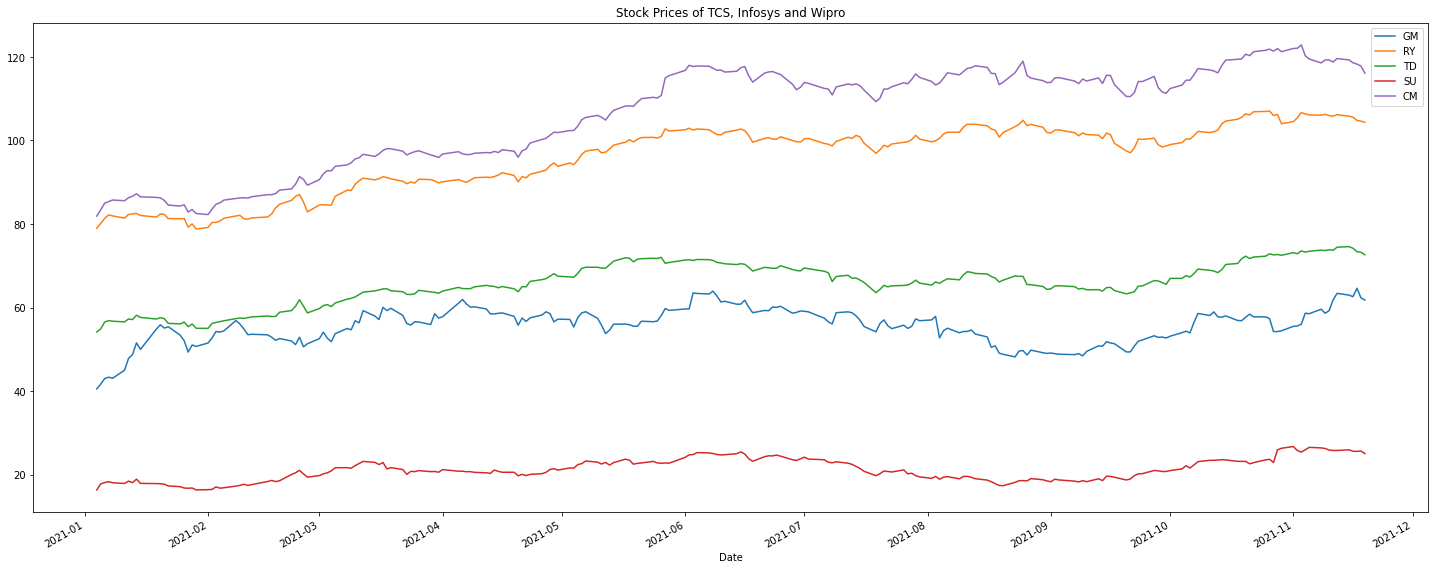

In [296]:
stock["GM"]['Close'].plot(label = 'GM', figsize = (25,10))
stock["RY"]['Close'].plot(label = 'RY', )
stock["TD"]['Close'].plot(label = 'TD', )
stock["SU"]['Close'].plot(label = 'SU', )
stock["CM"]['Close'].plot(label = 'CM', )
plt.title('Stock Prices of TCS, Infosys and Wipro')
plt.legend()

Text(0.5, 1.0, 'Volume')

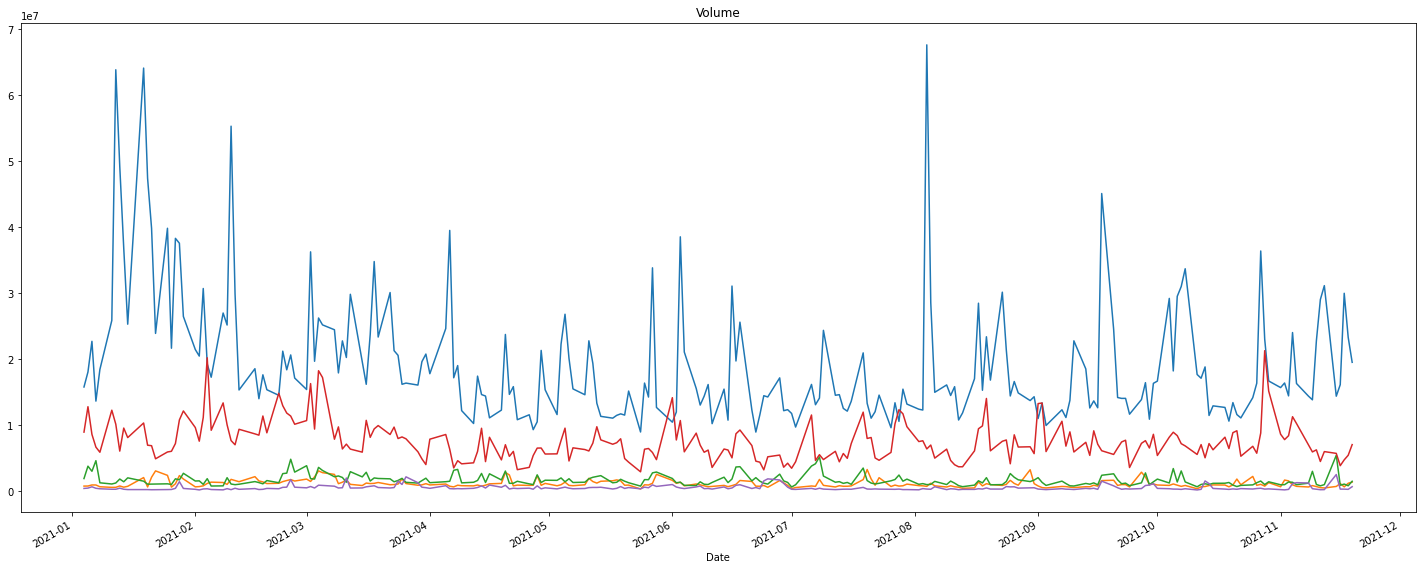

In [294]:
stock["GM"]['Volume'].plot(label = 'GM', figsize = (25,10))
stock["RY"]['Volume'].plot(label = 'RY', )
stock["TD"]['Volume'].plot(label = 'TD', )
stock["SU"]['Volume'].plot(label = 'SU', )
stock["CM"]['Volume'].plot(label = 'CM', )
plt.title('Stock Prices of TCS, Infosys and Wipro')
plt.legend()